Working of KNN Algorithm
K-nearest neighbors (KNN) algorithm uses ‘feature similarity’ to predict the values of new datapoints which further means that the new data point will be assigned a value based on how closely it matches the points in the training set. We can understand its working with the help of following steps −

Step 1 − For implementing any algorithm, we need dataset. So during the first step of KNN, we must load the training as well as test data.

Step 2 − Next, we need to choose the value of K i.e. the nearest data points. K can be any integer.

Step 3 − For each point in the test data do the following −

3.1 − Calculate the distance between test data and each row of training data with the help of any of the method namely: Euclidean, Manhattan or Hamming distance. The most commonly used method to calculate distance is Euclidean.

3.2 − Now, based on the distance value, sort them in ascending order.

3.3 − Next, it will choose the top K rows from the sorted array.

3.4 − Now, it will assign a class to the test point based on most frequent class of these rows.

Step 4 − End

In [1]:
#KNN Example
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd

In [2]:
#Header Names
headernames = ['sepal-length', 'sepal-width', 'petal-length', 'petal-width', 'Class']

In [3]:
dataset = pd.read_csv('C:/Users/Calsoft/Documents/jupyterNotebook/iris.data', names = headernames)
dataset.head()

,sepal-length,sepal-width,petal-length,petal-width,Class
0,5.1,3.5,1.4,0.2,Iris-setosa
1,4.9,3.0,1.4,0.2,Iris-setosa
2,4.7,3.2,1.3,0.2,Iris-setosa
3,4.6,3.1,1.5,0.2,Iris-setosa
4,5.0,3.6,1.4,0.2,Iris-setosa


In [4]:
X = dataset.iloc[:, :-1].values
y = dataset.iloc[:, 4].values

In [5]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.40)

In [6]:
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()
scaler.fit(X_train)
X_train = scaler.transform(X_train)
X_test = scaler.transform(X_test)

In [7]:
from sklearn.neighbors import KNeighborsClassifier
classifier = KNeighborsClassifier(n_neighbors = 8)
classifier.fit(X_train, y_train)

KNeighborsClassifier(n_neighbors=8)

In [8]:
y_pred = classifier.predict(X_test)

In [11]:
from sklearn.metrics import classification_report, confusion_matrix, accuracy_score
result = confusion_matrix(y_test, y_pred)
print("Confusion Matrix:")
print(result)
result1 = classification_report(y_test, y_pred)
print("Classification Report:",)
print (result1)
result2 = accuracy_score(y_test,y_pred)
print("Accuracy:",result2)

Confusion Matrix:
[[24  0  0]
 [ 0 19  0]
 [ 0  3 14]]
Classification Report:
                 precision    recall  f1-score   support

    Iris-setosa       1.00      1.00      1.00        24
Iris-versicolor       0.86      1.00      0.93        19
 Iris-virginica       1.00      0.82      0.90        17

       accuracy                           0.95        60
      macro avg       0.95      0.94      0.94        60
   weighted avg       0.96      0.95      0.95        60

Accuracy: 0.95


<AxesSubplot:>

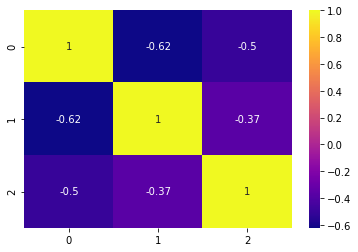

In [18]:
import seaborn as sn
cm = confusion_matrix(y_test, y_pred)
df_cm = pd.DataFrame(cm) 
sn.heatmap(df_cm.corr(),annot=True, cmap='plasma')